Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
2025 - Bimestre 5 <br>


<h1><center> Procesamiento de Lenguaje Natural

Tarea 1: Hate Speech Detection </center></h1>
        **Profesor**: Marcelo Mendoza<br>

---

# Integrantes
* Estudiante 1: Jason Sepulveda
* Estudiante 2: N/A

# Instrucciones

* Deberás entregar SOLO el archivo .ipynb.
* Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas.
* El notebook debe tener todas las celdas de código ejecutadas.

# Librerías

In [42]:
#Incorpore las librerías en esta sección
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

# Introducción

El conjunto de datos utilizado en este estudio se construyó a partir de tweets obtenidos a través de la API de Twitter y filtrados utilizando un léxico de discurso de odio proporcionado por Hatebase.org. Inicialmente, se identificaron y recopilaron tweets que contenían términos específicos catalogados como discurso de odio por la comunidad. Este proceso resultó en una muestra de 85.4 millones de tweets, provenientes de 33,458 usuarios de Twitter.

Posteriormente, se realizó una selección aleatoria de tweets de esta muestra inicial para su análisis detallado. Estos tweets fueron evaluados manualmente por trabajadores de CrowdFlower (CF), quienes clasificaron cada tweet en una de tres categorías: discurso de odio, lenguaje ofensivo pero no discurso de odio, y ni ofensivo ni discurso de odio.

**Estructura del dataset**

Para el desarrollo de la tarea, se deben concentrar en dos columnas:

* tweet: Contiene la oración que debe ser evaluada.
* label: Clasificación asociada a cada sentencia de la variable tweet.

Respecto a la variable label, se tiene la siguiente codificación:

* 0 - discurso de odio
* 1 - lenguaje ofensivo
* 2 - ninguno

El conjunto de datos ya está divido en train (df_train) y test (df_test)

# 1.- Descripción del conjunto de datos (10 puntos)

Concatene ambos conjuntos de datos para tener una mirada general del dataset. Responda las siguiente preguntas:

1.1 Grafique el número de ejemplos por tipo de clase. ¿El dataset está balanceado?

1.2  Calcule el largo de las oraciones para cada clase, considerando el número de palabras. ¿Se observa algún patrón?

1.3 Para cada clase, presente las 40 palabras más frecuentes. Comente.

Respuesta:

In [2]:
# Estoy trabajando en local, asi que voy a definir mis propios paths
from pathlib import Path
path_train = Path('data/raw/df_train.csv')
path_test = Path('data/raw/df_test.csv')
path_nltk = Path('data/raw/nltk_data')
path_stopwords = path_nltk / 'corpora/stopwords'

In [3]:
# A continuación, se presenta el código para cargar los conjuntos de train y test
df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

In [4]:
df_train

,Unnamed: 0,count,hate_speech,offensive_language,neither,label,tweet
0,21744,3,0,3,0,1,Talking Angela is a hoe
1,12933,3,0,2,1,1,Lol they tricking niccas left n right
2,997,3,0,3,0,1,&#128514;&#128514; bitches get stuff done. htt...
3,2534,3,0,3,0,1,@ArtaleGaspare bitch i got the flameeee
4,7470,3,0,3,0,1,@vivaalakatyy @brotherbill7 @JHuff_5 good bitc...
...,...,...,...,...,...,...,...
19821,17438,3,0,0,3,2,RT @RayIopez: When you're approaching your hig...
19822,7241,3,0,3,0,1,@skyereyes_ @keanabermudez YOOOOOOOOOOOOOO LMF...
19823,16347,3,0,0,3,2,RT @KelsieBelsi: @Vntxnius lmao it will have a...
19824,23517,3,1,2,0,1,"Y'all hoes broke, be stealing from the mall bu..."


In [5]:
df_test

,Unnamed: 0,count,hate_speech,offensive_language,neither,label,tweet
0,16183,3,0,3,0,1,RT @JimNorton: There is a GIFT SHOP at the 9-1...
1,3239,3,0,0,3,2,@Fabulousjonna_ I need some red green &amp; ye...
2,25097,3,0,3,0,1,this the one&#128076;RT @SumthinNueee hoes don...
3,365,3,0,3,0,1,"""@lildurk_: I can turn yo bitch into a eaterrr..."
4,16493,3,0,3,0,1,RT @LUNAraps: smh u got Ebola now RT&#8220;@Br...
...,...,...,...,...,...,...,...
4952,8198,3,0,2,1,1,Because of the message that sends to LGBTQ res...
4953,8435,3,0,3,0,1,Bruh this niggah always falls asleep ! &#12853...
4954,592,3,2,1,0,0,"""We're out here, and we're queer!""\n"" 2, 4, 6,..."
4955,18213,3,0,3,0,1,RT @TooTurntNacho: Why give a bitch ya heart w...


In [6]:
# agregar una columna 'source' para identificar el origen de los datos
df_train['source'] = 'train'
df_test['source'] = 'test'

In [7]:
# revisar las columnas de interes, es decir el label y el tweet
df_train[['label', 'tweet', 'source']].head(10)

,label,tweet,source
0,1,Talking Angela is a hoe,train
1,1,Lol they tricking niccas left n right,train
2,1,&#128514;&#128514; bitches get stuff done. htt...,train
3,1,@ArtaleGaspare bitch i got the flameeee,train
4,1,@vivaalakatyy @brotherbill7 @JHuff_5 good bitc...,train
5,1,I like saying the word pussy hoe ion no why!!!,train
6,1,This bitch forehead. Hairline. Who lied to her...,train
7,1,@mingtong007 you still are a cunt,train
8,1,I feel bad for her nicca tho ... Ya girl a hoe...,train
9,2,Log off nigger RT @PoloKingBC: #relationshipgo...,train


In [8]:
# las dimensiones de ambos conjuntos de datos
df_train.shape, df_test.shape

((19826, 8), (4957, 8))

In [9]:
# solo verificar que tengan las mismas columnas para concatenar luego
df_train.columns, df_test.columns

(Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
        'label', 'tweet', 'source'],
       dtype='object'),
 Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
        'label', 'tweet', 'source'],
       dtype='object'))

In [10]:
# concatenar ambos datasets
df = pd.concat([df_train, df_test], ignore_index=True)
print(df.shape)

df.head(10)

(24783, 8)


,Unnamed: 0,count,hate_speech,offensive_language,neither,label,tweet,source
0,21744,3,0,3,0,1,Talking Angela is a hoe,train
1,12933,3,0,2,1,1,Lol they tricking niccas left n right,train
2,997,3,0,3,0,1,&#128514;&#128514; bitches get stuff done. htt...,train
3,2534,3,0,3,0,1,@ArtaleGaspare bitch i got the flameeee,train
4,7470,3,0,3,0,1,@vivaalakatyy @brotherbill7 @JHuff_5 good bitc...,train
5,10955,6,0,6,0,1,I like saying the word pussy hoe ion no why!!!,train
6,22423,3,1,2,0,1,This bitch forehead. Hairline. Who lied to her...,train
7,6882,3,0,3,0,1,@mingtong007 you still are a cunt,train
8,10557,3,0,3,0,1,I feel bad for her nicca tho ... Ya girl a hoe...,train
9,12882,3,0,1,2,2,Log off nigger RT @PoloKingBC: #relationshipgo...,train


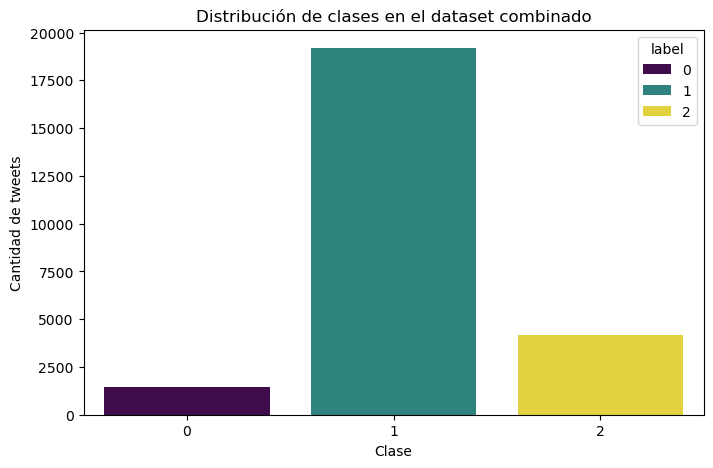

In [11]:
# graficar la distribución de las clases en el dataset combinado
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df, palette='viridis', hue='label')
plt.title('Distribución de clases en el dataset combinado')
plt.xlabel('Clase')
plt.ylabel('Cantidad de tweets')
plt.show()

### 1.1 Grafique el número de ejemplos por tipo de clase. ¿El dataset está balanceado?

## Respuesta:

El dataset no esta balanceado, se puede ver en el grafico de arriba que la clase 1, es decir, de lenguaje ofensivo, es significativamente superior a las otras 2 clases.

### 1.2  Calcule el largo de las oraciones para cada clase, considerando el número de palabras. ¿Se observa algún patrón?

## Respuesta

La clase 1 al tener mas registros tambien la cantidad de palabras totales son mayores, sin embargo luego al revisar el promedio de palabra por cada una de las clases, es posible notar que tienen entre 13 y 15 palabras en promedio, incluso esa misma tendencia se da en cada uno de los cuartiles, por lo que en cantidad de palabras no hay una diferenciacion entre clases y cumplen un patron similar en cantidad de palabras.

Para la clase 2 el maximo de palabras es mayor a 50, por lo que debe ser un outlier o incluso como el texto no ha sido limpiado es posible que se esten contando algunos caracteres como palabras.

In [12]:
# Entender y ejemplificar como contar cada una de las palabras en un tweet

sentence1 = df['tweet'][0]

for word in sentence1.split():
    print(word)


count_words1 = len(sentence1.split())
print(f'El tweet tiene {count_words1} palabras.')

Talking
Angela
is
a
hoe
El tweet tiene 5 palabras.


In [13]:
# agregaremos una nueva columna al dataframe con el conteo de palabras por tweet
df['sentence_length'] = df['tweet'].apply(lambda x: len(x.split()))

# revisar el dataframe con la nueva columna
df.head(10)

,Unnamed: 0,count,hate_speech,offensive_language,neither,label,tweet,source,sentence_length
0,21744,3,0,3,0,1,Talking Angela is a hoe,train,5
1,12933,3,0,2,1,1,Lol they tricking niccas left n right,train,7
2,997,3,0,3,0,1,&#128514;&#128514; bitches get stuff done. htt...,train,6
3,2534,3,0,3,0,1,@ArtaleGaspare bitch i got the flameeee,train,6
4,7470,3,0,3,0,1,@vivaalakatyy @brotherbill7 @JHuff_5 good bitc...,train,6
5,10955,6,0,6,0,1,I like saying the word pussy hoe ion no why!!!,train,10
6,22423,3,1,2,0,1,This bitch forehead. Hairline. Who lied to her...,train,14
7,6882,3,0,3,0,1,@mingtong007 you still are a cunt,train,6
8,10557,3,0,3,0,1,I feel bad for her nicca tho ... Ya girl a hoe...,train,14
9,12882,3,0,1,2,2,Log off nigger RT @PoloKingBC: #relationshipgo...,train,7


In [14]:
# ahora que tenemos la columna con el largo de la oracion, vamos a agrupar por label para identificar patrones

df.groupby('label')['sentence_length'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,1430.0,13.906993,7.037868,1.0,8.0,13.5,20.0,32.0
1,19190.0,13.958624,6.802658,1.0,8.0,13.0,19.0,36.0
2,4163.0,14.919289,6.801590,1.0,9.0,15.0,20.0,52.0


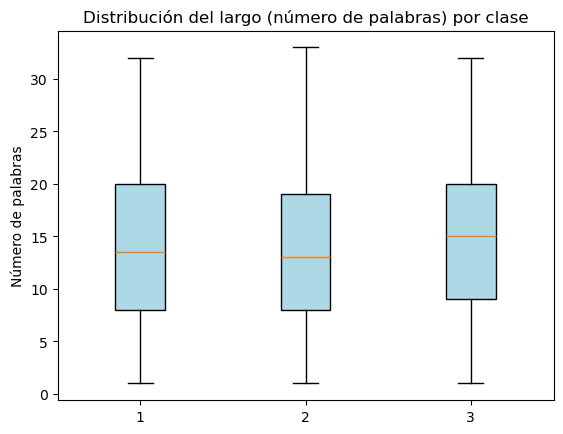

In [15]:
# graficar la distribución del largo de las oraciones por clase

data = [df.loc[df['label']==k, 'sentence_length'].values for k in [0,1,2]]
plt.figure()
plt.boxplot(data, showfliers=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Distribución del largo (número de palabras) por clase")
plt.ylabel("Número de palabras")
plt.show()

### 1.3 Para cada clase, presente las 40 palabras más frecuentes. Comente.

## Respuesta

Al usal Counter de la libreria collection podemos notar que cada clase comparten varias palabras, muchas de ellas definitivamente son stopwords por lo que sin duda esto demuestra que es muy necesario hacer un preprocesamiento y limpieza de los tweets antes de seguir analizando o tomando decisiones, abajo podran ver un diccionario con las mas comunes por clase y ademas un grafico en forma descendente

In [16]:
# Obtener las 40 palabras mas comunes por clase usando Counter de la librería collections
from collections import Counter

common_words = {}

for label in [0, 1, 2]:
    tweets = df[df['label'] == label]['tweet']
    words = ' '.join(tweets).split()
    word_counts = Counter(words)
    common_words[label] = word_counts.most_common(40)

common_words

{0: [('a', 530),
  ('the', 349),
  ('you', 348),
  ('to', 320),
  ('RT', 320),
  ('I', 296),
  ('and', 219),
  ('is', 194),
  ('bitch', 164),
  ('that', 161),
  ('like', 157),
  ('in', 154),
  ('faggot', 148),
  ('of', 148),
  ('be', 129),
  ('my', 128),
  ('ass', 127),
  ('your', 117),
  ('white', 116),
  ('are', 112),
  ('on', 105),
  ('nigga', 103),
  ('me', 99),
  ('u', 96),
  ('for', 95),
  ('fuck', 87),
  ('all', 85),
  ('nigger', 82),
  ('this', 79),
  ('fucking', 79),
  ('with', 77),
  ('trash', 71),
  ('they', 69),
  ('so', 68),
  ('up', 67),
  ('just', 66),
  ('it', 65),
  ("don't", 64),
  ('get', 63),
  ('but', 62)],
 1: [('a', 7301),
  ('bitch', 6464),
  ('RT', 5912),
  ('I', 5252),
  ('the', 4545),
  ('you', 4092),
  ('to', 3926),
  ('and', 2639),
  ('my', 2599),
  ('that', 2588),
  ('bitches', 2525),
  ('like', 2095),
  ('in', 2061),
  ('is', 1931),
  ('me', 1903),
  ('be', 1872),
  ('hoes', 1871),
  ('on', 1869),
  ('of', 1684),
  ('pussy', 1667),
  ('for', 1452),
  ('wi

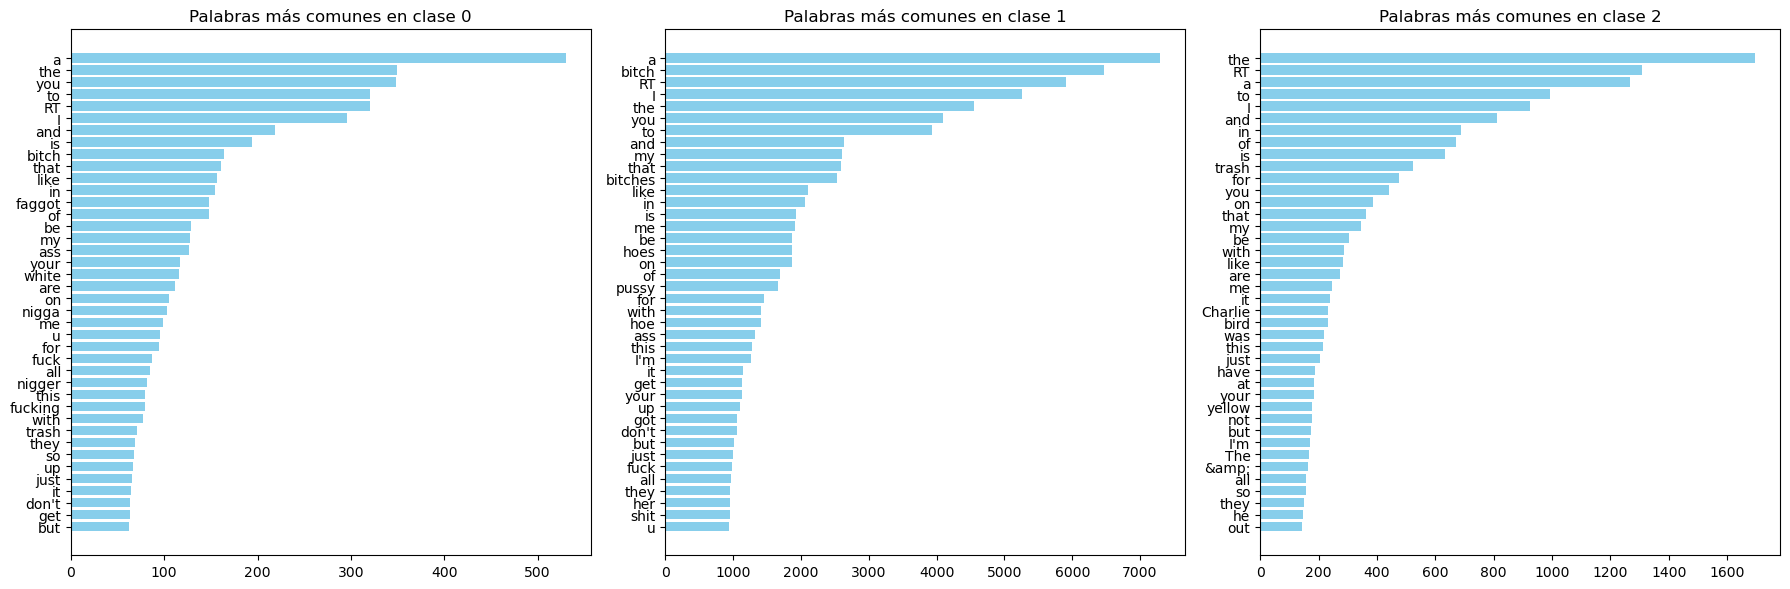

In [17]:
# Graficar las palabras más comunes por clase
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, label in enumerate([0, 1, 2]):
    words, counts = zip(*common_words[label])
    axes[i].barh(words, counts, color='skyblue')
    axes[i].set_title(f'Palabras más comunes en clase {label}')
    axes[i].invert_yaxis()
plt.tight_layout()
plt.show()

#  2.- Preprocesamiento de texto (5 puntos)

Realice un preprocesamiento del texto. Justifique sus decisiones.

De implementar esta solución, siga trabajando con los conjuntos procesados para crear el clasificador del punto 3.

Respuesta:

In [18]:
# importar nltk y descargar los recursos necesarios
import nltk

if str(path_nltk) not in nltk.data.path:
    nltk.data.path.insert(0, str(path_nltk))

nltk.download('stopwords', download_dir=str(path_nltk))
nltk.download("punkt_tab", download_dir=str(path_nltk))
nltk.download("punkt", download_dir=str(path_nltk))

nltk.download("wordnet", download_dir=str(path_nltk))
nltk.download("omw-1.4", download_dir=str(path_nltk))



[nltk_data] Downloading package stopwords to data/raw/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to data/raw/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to data/raw/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to data/raw/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to data/raw/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [19]:
# importacion de librerias
import re
from nltk.corpus import stopwords


# Load stop-words
stop_words = set(stopwords.words('english'))

In [20]:
# limpieza con expresiones regulares

url_re = re.compile(r'https?://\S+|www\.\S+')
mention_re = re.compile(r'@\w+')
html_entity_re = re.compile(r'&#\d+;')
nonword_re = re.compile(r"[^a-zA-Z'\s]+")

# función de limpieza de tweets
def clean_tweet(tweet):
    tweet = url_re.sub('', tweet)
    tweet = mention_re.sub('', tweet)
    tweet = html_entity_re.sub('', tweet)
    tweet = nonword_re.sub(' ', tweet)
    tweet = tweet.lower()
    tweet = ' '.join([word for word in tweet.split() if len(word) > 2])
    tweet = ' '.join(
        [word for word in tweet.split() if word not in stop_words])
    return tweet

In [21]:
# agregamos una nueva columna con los tweets limpios
df['cleaned_tweet'] = df['tweet'].apply(clean_tweet)

df.head(10)

,Unnamed: 0,count,hate_speech,offensive_language,neither,label,tweet,source,sentence_length,cleaned_tweet
0,21744,3,0,3,0,1,Talking Angela is a hoe,train,5,talking angela hoe
1,12933,3,0,2,1,1,Lol they tricking niccas left n right,train,7,lol tricking niccas left right
2,997,3,0,3,0,1,&#128514;&#128514; bitches get stuff done. htt...,train,6,bitches get stuff done
3,2534,3,0,3,0,1,@ArtaleGaspare bitch i got the flameeee,train,6,bitch got flameeee
4,7470,3,0,3,0,1,@vivaalakatyy @brotherbill7 @JHuff_5 good bitc...,train,6,good bitch choke
5,10955,6,0,6,0,1,I like saying the word pussy hoe ion no why!!!,train,10,like saying word pussy hoe ion
6,22423,3,1,2,0,1,This bitch forehead. Hairline. Who lied to her...,train,14,bitch forehead hairline lied amp approved shit
7,6882,3,0,3,0,1,@mingtong007 you still are a cunt,train,6,still cunt
8,10557,3,0,3,0,1,I feel bad for her nicca tho ... Ya girl a hoe...,train,14,feel bad nicca tho girl hoe nicca
9,12882,3,0,1,2,2,Log off nigger RT @PoloKingBC: #relationshipgo...,train,7,log nigger relationshipgoals


In [22]:
# voy a volver a revisar las 40 palabras mas comunes por clase, pero ahora con los tweets limpios

common_words_cleaned_tweet = {}
for label in [0, 1, 2]:
    tweets = df[df['label'] == label]['cleaned_tweet']
    words = ' '.join(tweets).split()
    word_counts = Counter(words)
    common_words_cleaned_tweet[label] = word_counts.most_common(40)

common_words_cleaned_tweet

{0: [('bitch', 209),
  ('faggot', 190),
  ('like', 169),
  ('nigga', 139),
  ('ass', 137),
  ('white', 127),
  ('fuck', 121),
  ('trash', 113),
  ('nigger', 112),
  ('fucking', 95),
  ('niggas', 76),
  ('fag', 76),
  ('get', 68),
  ('faggots', 62),
  ('shit', 60),
  ('bitches', 59),
  ('people', 58),
  ('hate', 58),
  ('niggers', 56),
  ('hoes', 55),
  ('amp', 50),
  ('pussy', 49),
  ('lol', 49),
  ('got', 48),
  ('hoe', 43),
  ('look', 39),
  ('man', 39),
  ('one', 39),
  ('know', 38),
  ('black', 38),
  ('stupid', 37),
  ('fags', 36),
  ('say', 35),
  ('want', 34),
  ('kill', 33),
  ('racist', 32),
  ('retarded', 32),
  ('think', 31),
  ('gay', 31),
  ('ugly', 31)],
 1: [('bitch', 8104),
  ('bitches', 3057),
  ('hoes', 2327),
  ('like', 2312),
  ('pussy', 2090),
  ('hoe', 1866),
  ('ass', 1438),
  ('fuck', 1305),
  ('get', 1220),
  ('shit', 1217),
  ('got', 1141),
  ('nigga', 1078),
  ('lol', 898),
  ("ain't", 854),
  ('niggas', 714),
  ('amp', 703),
  ('know', 683),
  ('love', 588),

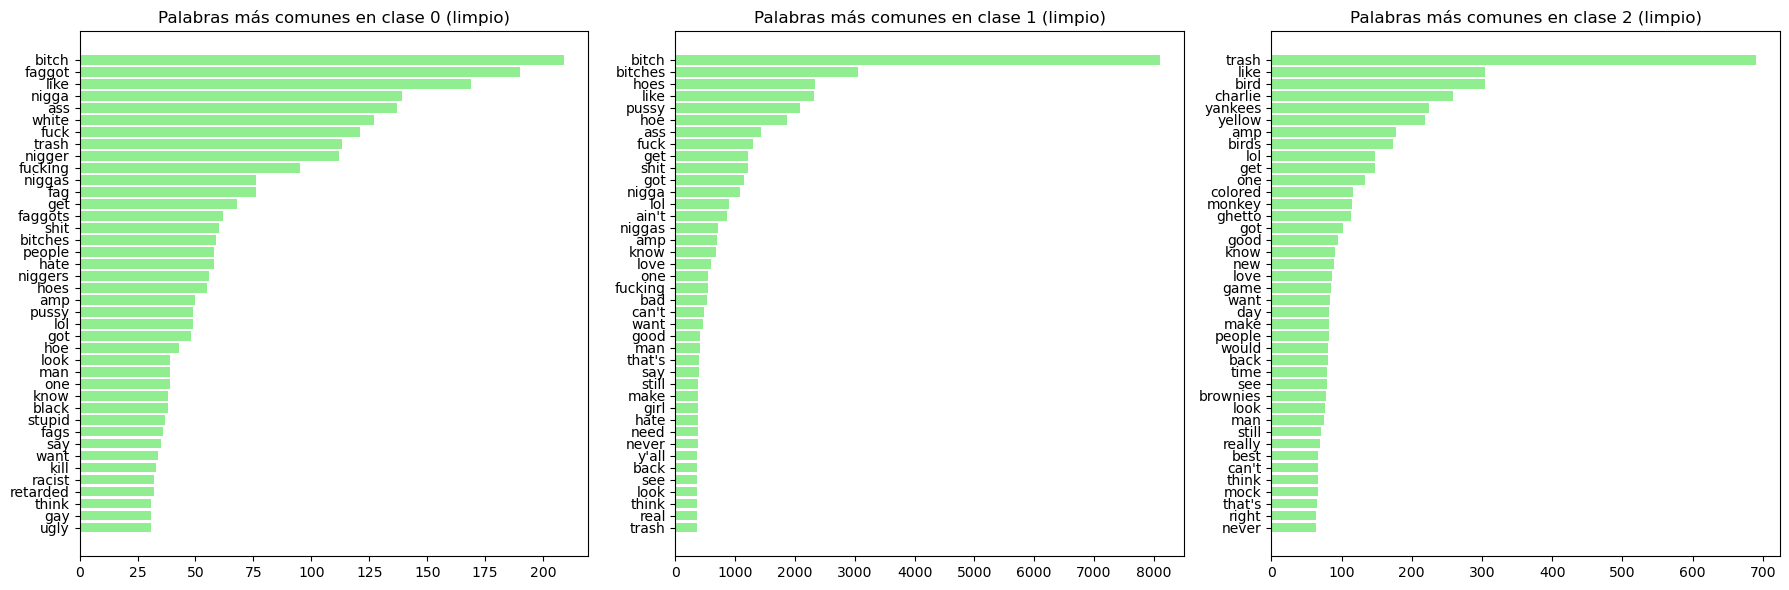

In [23]:
# volvemos a graficar las palabras más comunes por clase, pero ahora con los tweets limpios
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, label in enumerate([0, 1, 2]):
    words, counts = zip(*common_words_cleaned_tweet[label])
    axes[i].barh(words, counts, color='lightgreen')
    axes[i].set_title(f'Palabras más comunes en clase {label} (limpio)')
    axes[i].invert_yaxis()
plt.tight_layout()
plt.show()

In [24]:
# siguiendo con el preprocesamiento, vamos a hacer lematización usando WordNetLemmatizer de nltk
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()


def lemmatize_tweet(tweet):
    return ' '.join([lemmatizer.lemmatize(word) for word in tweet.split()])


df['lemmatized_tweet'] = df['cleaned_tweet'].apply(lemmatize_tweet)
df.tail(10)

,Unnamed: 0,count,hate_speech,offensive_language,neither,label,tweet,source,sentence_length,cleaned_tweet,lemmatized_tweet
24773,685,3,0,3,0,1,#BitchSlapThursdays 2NITE PURE PASSION DOORS O...,test,18,bitchslapthursdays nite pure passion doors ope...,bitchslapthursdays nite pure passion door open...
24774,11001,3,0,0,3,2,I love me some chunky babies &#128525;&#128525;,test,7,love chunky babies,love chunky baby
24775,17513,3,0,0,3,2,"RT @RobertCDick: Protest climate change, leave...",test,9,protest climate change leaves trash behind vot...,protest climate change leaf trash behind votin...
24776,1152,3,0,2,1,1,&#8220;@BarryClerjuste: I cried like a bitch a...,test,14,cried like bitch first breakup never loved lol,cried like bitch first breakup never loved lol
24777,19067,3,0,0,3,2,RT @bigbluexpress: Cal has a day off and for g...,test,26,cal day giggles heads yankee stadium hang dere...,cal day giggle head yankee stadium hang derek ...
24778,8198,3,0,2,1,1,Because of the message that sends to LGBTQ res...,test,26,message sends lgbtq residents state west virgi...,message sends lgbtq resident state west virgin...
24779,8435,3,0,3,0,1,Bruh this niggah always falls asleep ! &#12853...,test,8,bruh niggah always falls asleep,bruh niggah always fall asleep
24780,592,3,2,1,0,0,"""We're out here, and we're queer!""\n"" 2, 4, 6,...",test,17,queer hut like butt,queer hut like butt
24781,18213,3,0,3,0,1,RT @TooTurntNacho: Why give a bitch ya heart w...,test,14,give bitch heart rather purse,give bitch heart rather purse
24782,16975,3,0,3,0,1,RT @NYRKelsMads: Almost forgot. Posing as an o...,test,19,almost forgot posing old brawd get pussy needl...,almost forgot posing old brawd get pussy needl...


# 3.- Entrenar clasificador con TF-IDF (10 puntos)

Construya la matriz TF-IDF para los conjuntos train y test. Indique el tamaño del vocabulario considerando el set de train.

Luego, entrene un clasificador mediante una técnica de machine learning.

Calcule las métricas Precision, Recall y F1-score para el conjunto test (general y por clase). Comente los resultados.

Respuesta:

In [30]:
# dividir el dataset nuevamente en train y test

df_train_preprocessed = df[df['source'] == 'train'].drop(columns=['source'])
df_test_preprocessed = df[df['source'] == 'test'].drop(columns=['source'])

df_train_preprocessed.shape, df_test_preprocessed.shape

((19826, 10), (4957, 10))

In [31]:
# vectorizar usando TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(
    df_train_preprocessed['lemmatized_tweet']).toarray()

y_train = df_train_preprocessed['label'].values

X_train.shape, y_train.shape





((19826, 15984), (19826,))

In [33]:
x_test = vectorizer.transform(
    df_test_preprocessed['lemmatized_tweet']).toarray()

y_test = df_test_preprocessed['label'].values

x_test.shape, y_test.shape

((4957, 15984), (4957,))

In [36]:
# medir el tamano del vocabulario
vocab_size = len(vectorizer.get_feature_names_out())
print(f'Tamaño del vocabulario: {vocab_size}')

Tamaño del vocabulario: 15984


In [38]:
vocab_size = len(vectorizer.vocabulary_)
vocab_size

15984

In [34]:
# entrenamiento y evaluación de un clasificador Naive Bayes

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

clf.fit(X_train, y_train)
clf.score(x_test, y_test)


0.802098043171273

In [35]:
# evaluar el modelo con un reporte de clasificación
from sklearn.metrics import classification_report

y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       286
           1       0.80      1.00      0.89      3838
           2       0.95      0.17      0.29       833

    accuracy                           0.80      4957
   macro avg       0.58      0.39      0.39      4957
weighted avg       0.78      0.80      0.74      4957



/Users/jasonssdev/opt/anaconda3/envs/nlp-py311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/jasonssdev/opt/anaconda3/envs/nlp-py311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/jasonssdev/opt/anaconda3/envs/nlp-py311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _war

### Comentario de resultados:

El modelo esta sesgado para la clase 1, no predice nada de la clase cero en ninguna de las 3 metricas, y practicamente no recupera de la clase 2 con el 0.17. Si bien el accuracy es 0.8 seguramente es por el desbalanceo del dataset

In [40]:
# vamos a usar un modelo linear de clasificacion y hacer algunos ajustes al desbalance

from sklearn.svm import LinearSVC

clf2 = LinearSVC(class_weight='balanced', random_state=42, dual=False)

clf2.fit(X_train, y_train)
clf2.score(x_test, y_test)

0.8815816017752673

In [41]:
# metricas del segundo modelo
y_pred2 = clf2.predict(x_test)
print(classification_report(y_test, y_pred2))


              precision    recall  f1-score   support

           0       0.36      0.37      0.37       286
           1       0.94      0.92      0.93      3838
           2       0.81      0.88      0.85       833

    accuracy                           0.88      4957
   macro avg       0.70      0.72      0.71      4957
weighted avg       0.88      0.88      0.88      4957



### Comentarios del segundo modelo

Sin duda hubo una mejora en las predicciones, la clase 1 y 2 tienen alta precision y recall, pero la clase 0 sigue con un bajo recall, si bien el class weight ayudo sigue costando detectar esa clase. Se podria seguir mejorando el modelo con re muestreo u otras tecnicas

# 4.- Matriz de confusión (5 puntos)

Construya una matriz de confusión con los resultados obtenidos en el punto 3. Interprete los resultados en el contexto del problema.

Respuesta:

In [43]:
# funcion vista en clases anteriores para graficar la matriz de confusión

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [44]:
from sklearn.metrics import confusion_matrix

Normalized confusion matrix


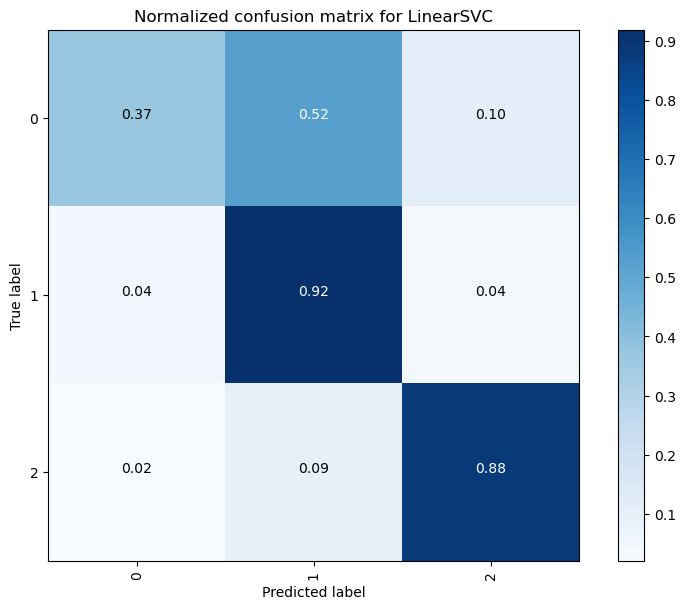

In [45]:
cm = confusion_matrix(y_test, y_pred2)
np.set_printoptions(precision=2)   

plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=['0', '1', '2'], normalize=True, title='Normalized confusion matrix for LinearSVC')
plt.show()

### Respuesta

El modelo presenta un buen desempeño general en las clases mayoritarias. La clase lenguaje ofensivo (1) alcanza un recall cercano al 92%, mientras que la clase ninguno (2) obtiene alrededor de 88%, lo que indica que el clasificador identifica correctamente la mayoría de los casos en estas categorías. Esto sugiere que el modelo captura adecuadamente la toxicidad general del texto cuando esta es clara y frecuente en los datos.

La principal debilidad se observa en la clase discurso de odio (0), con un recall aproximado del 37%. Más de la mitad de los casos reales de odio se confunden con lenguaje ofensivo y una fracción menor con la clase ninguno. En el contexto del problema, este bajo recall es crítico, ya que implica que una cantidad relevante de mensajes de odio no es detectada. Para mitigar este riesgo, se recomienda priorizar el recall de esta clase mediante mayor ponderación, ajustes de regularización, uso de n-grams y técnicas de re-muestreo, incluso a costa de aumentar los falsos positivos.